In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
topo = open("topography.xyz","r").read()
print(topo[0:100])

31	42	0
31.0008333333	42	0
31.0016666667	42	0
31.0025	42	0
31.0033333333	42	0
31.0041666667	42	0
31.


In [3]:
splitted_topo = topo.split("\n")[:-1]
x = []; y = []; z = []
for element in splitted_topo:
    a, b, c = element.split("\t")
    a = float(a); b = float(b); c = float(c)
    x.append(a); y.append(b); z.append(c)

In [4]:
print(len(z), len(z)**.5)

12967201 3601.0


In [5]:
height = np.array(z); x = np.array(x); y = np.array(y)
x = x.reshape((3601,3601))
y = y.reshape((3601,3601))
topomap = height.reshape((3601,3601))

In [6]:
print(x[0][0], x[0][3600])
print(y[0][0], y[3600][0])
print(min(height), max(height))

31.0 34.0
42.0 39.0
-8.0 2573.0


In [7]:
print(topomap[200][2275] == topomap[200][2275])

False


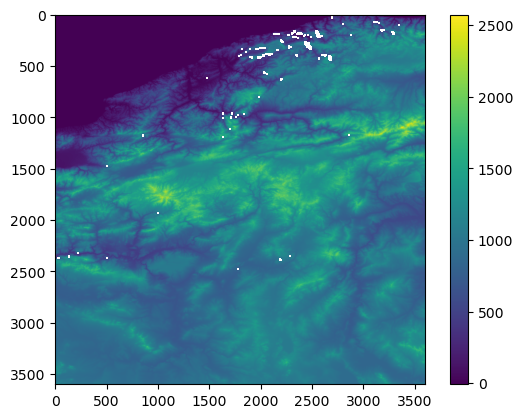

In [38]:
plt.imshow(topomap)
plt.colorbar()

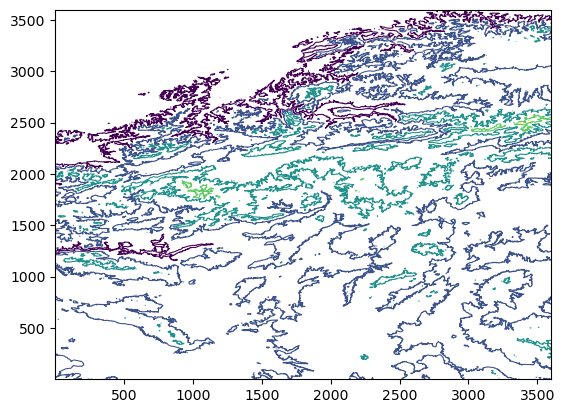

In [38]:
plt.contour(topomap, [500, 1000, 1500, 2000, 2500], origin = "upper", linewidths =)

In [78]:
def topographyCropper(topography, point1, point2):
    """
    Top left and bottom right points' coordinates are expected.
    """
    
    splitted_topo = topography.split("\n")[:-1]
    x = []; y = []; z = []
    
    for element in splitted_topo:
        a, b, c = element.split("\t")
        a = float(a); b = float(b); c = float(c)
        x.append(a); y.append(b); z.append(c)
    
    height = np.array(z); x = np.array(x); y = np.array(y)
    x = x.reshape((3601,3601))
    y = y.reshape((3601,3601))
    indexy = y.T
    topomap = height.reshape((3601,3601))
    
    p1index = (np.where(x[0] == point1[0])[0][0], np.where(indexy[0] == point1[1])[0][0])
    p2index = (np.where(x[0] == point2[0])[0][0], np.where(indexy[0] == point2[1])[0][0])
    
    cropped_topo = np.zeros((p2index[0] - p1index[0], p2index[1] - p1index[1]))
    
    alpha = 0
    for y in range(p1index[1], p2index[1]):
        cropped_topo[alpha][:] = topomap[y][p1index[0]:p2index[0]]
        alpha += 1
        
    return cropped_topo

In [79]:
p1 = (x[0][500], y[1500][0])
p1

(31.4166666667, 40.75)

In [80]:
p2 = (x[0][1000], y[2000][0])
p2

(31.8333333333, 40.3333333333)

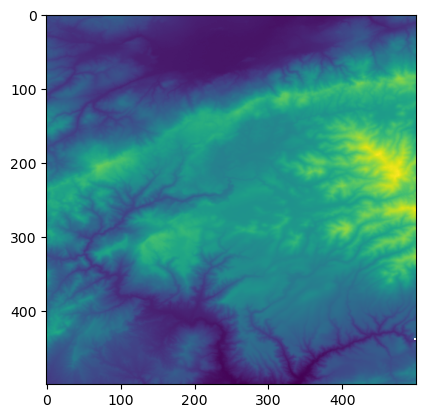

In [81]:
plt.imshow(topographyCropper(topo, p1, p2))